This notebook trains a neural network with TCGA as the only data seen during training and a combination of raw mutations and CNV are used as input. 

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append("../src/")

In [3]:
import datetime
import logging
import time
import torch
import random

In [4]:
from TcgaClassifierModel import ModelTCGAClassifier

In [5]:
chosen_seed = 42
torch.manual_seed(chosen_seed)
random.seed(chosen_seed)
np.random.seed(chosen_seed)

In [6]:
torch.multiprocessing.set_sharing_strategy('file_system')

### PACLITAXEL

In [7]:
best_parameters = {'ldr': 0.4022600448226033,
 'batch_size': 32,
 'lr': 0.3130530561518362,
 'weight_decay': 0.07545761288934259,
 'momentum': 0.07293652524996726,
 'step_size': 38,
 'loops_train': 150,
 'hd': 2,
 'seed': 42}

In [8]:
model_PACLITAXEL = ModelTCGAClassifier('PACLITAXEL', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_PACLITAXEL.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.4022600448226033, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.4022600448226033, 'batch_size': 32, 'lr': 0.3130530561518362, 'weight_decay': 0.07545761288934259, 'momentum': 0.07293652524996726, 'step_size': 38, 'loops_train': 150, 'hd': 2, 'seed': 42}
-------PACLITAXEL-------
tcga train set size: 65
tcga validation set size: 17
pdx test set size: 8
tcga test set size: 31
Highest AUROC achieved during training: 0.7727272727272727
Test set Idx 0 has only response [0]
[0.98081231 0.98261405 0.98389548 0.98697147 0.

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,8,{0: 8},NaN,-0.000000
0,TCGA,31,"{1: 23, 0: 8}",0.527174,0.824041


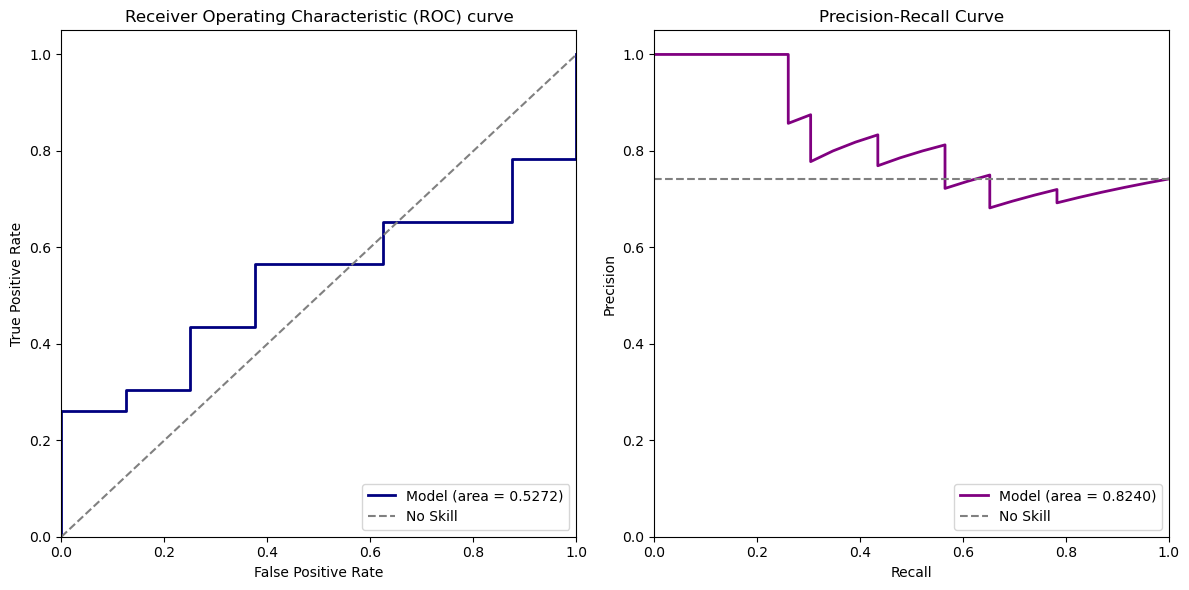

In [9]:
model_PACLITAXEL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [10]:
model_PACLITAXEL.get_train_set_results(best_parameters, False)

,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,35,"{0: 30, 1: 5}",0.373333,0.13339
0,TCGA,82,"{1: 53, 0: 29}",0.985686,0.99220


Distribution of Predictions by Model
[0.94849944 0.98214039 0.98489213 0.98686838 0.98991138]
TP: 23, FP: 8, TN: 0, FN: 0


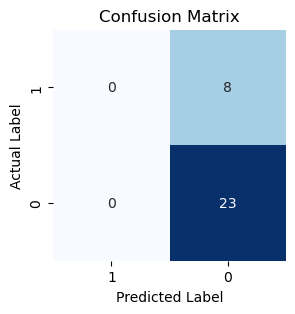

In [11]:
model_PACLITAXEL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

### CISPLATIN

In [12]:
best_parameters = {'ldr': 0.4202369553588094,
 'batch_size': 32,
 'lr': 0.1,
 'weight_decay': 0.0332877692029513,
 'momentum': 0.6,
 'step_size': 40,
 'loops_train': 100,
 'hd': 4,
 'seed': 42}

In [13]:
model_CISPLATIN = ModelTCGAClassifier('CISPLATIN', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_CISPLATIN.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.4202369553588094, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.4202369553588094, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.4202369553588094, 'batch_size': 32, 'lr': 0.1, 'weight_decay': 0.0332877692029513, 'momentum': 0.6, 'step_size': 40, 'loops_train': 100, 'hd': 4, 'seed': 42}
-------CISPLATIN-------
tcga train set size: 136
tcga validation set size: 

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,36,"{1: 27, 0: 9}",0.641975,0.831041


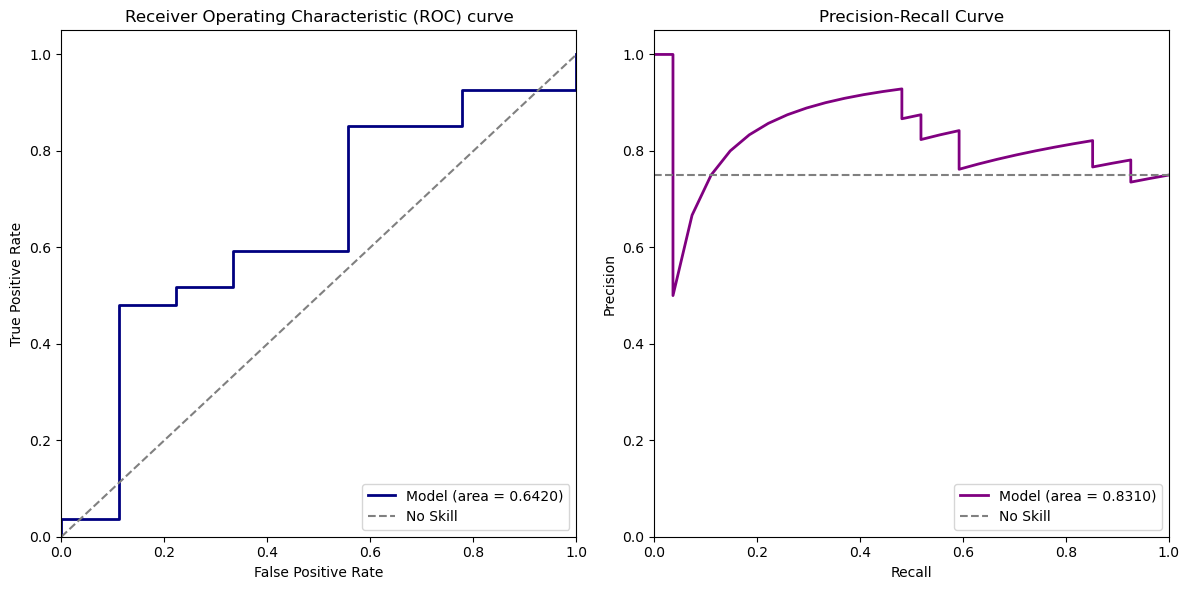

In [14]:
model_CISPLATIN.get_roc_pr_curves(best_parameters, False, 'tcga')

In [15]:
model_CISPLATIN.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,170,"{1: 130, 0: 40}",0.600385,0.844813


Distribution of Predictions by Model
[0.83273965 0.83350857 0.8337521  0.83390807 0.83511347]
TP: 27, FP: 9, TN: 0, FN: 0


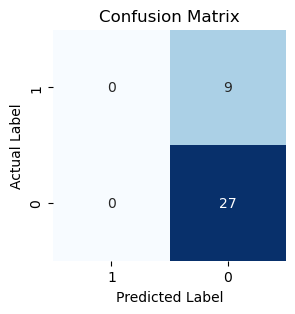

In [16]:
model_CISPLATIN.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## 5-FLUOROURACIL

In [17]:
best_parameters = {'ldr': 0.56397072263062,
 'lr': 0.3805612259544432,
 'weight_decay': 0.02424294270575047,
 'momentum': 0.20344327450729907,
 'step_size': 31,
 'loops_train': 250,
 'hd': 3,
 'batch_size': 32,
 'seed': 42}

In [18]:
model_5_FLUOROURACIL = ModelTCGAClassifier('5-FLUOROURACIL', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_5_FLUOROURACIL.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.56397072263062, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.56397072263062, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.56397072263062, 'lr': 0.3805612259544432, 'weight_decay': 0.02424294270575047, 'momentum': 0.20344327450729907, 'step_size': 31, 'loops_train': 250, 'hd': 3, 'batch_size': 32, 'seed': 42}
-------5-FLUOROURACIL-------
tcga train s

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,21,"{1: 17, 0: 4}",0.867647,0.97191


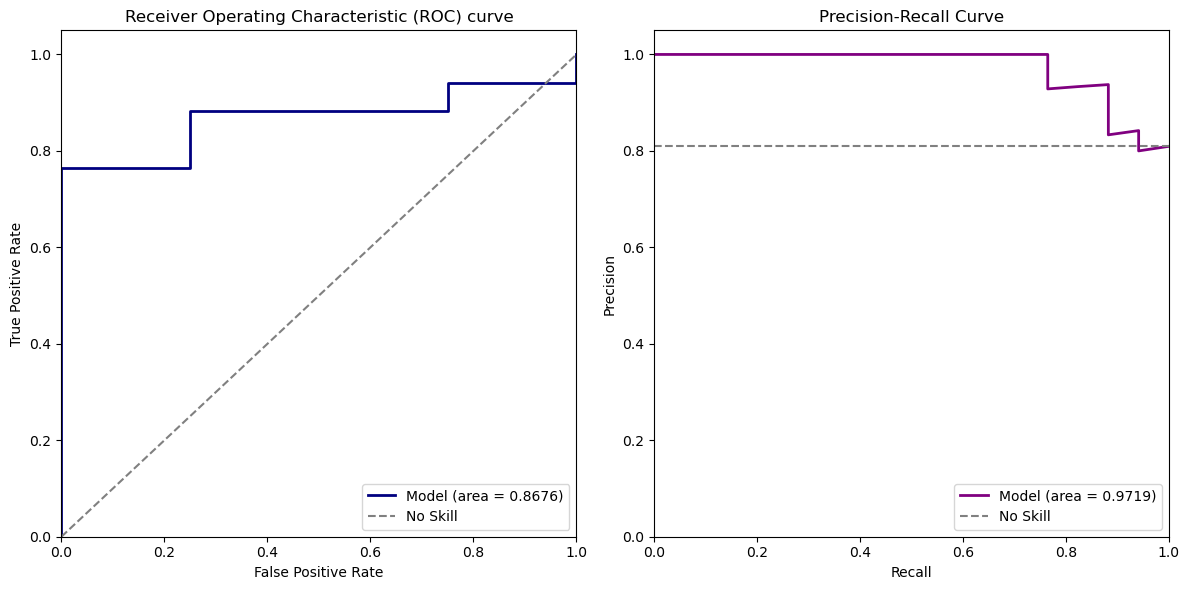

In [19]:
model_5_FLUOROURACIL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [20]:
model_5_FLUOROURACIL.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,104,"{1: 65, 0: 39}",0.8643,0.901151


Distribution of Predictions by Model
[0.86303955 0.86365497 0.86384678 0.86394548 0.86409533]
TP: 17, FP: 4, TN: 0, FN: 0


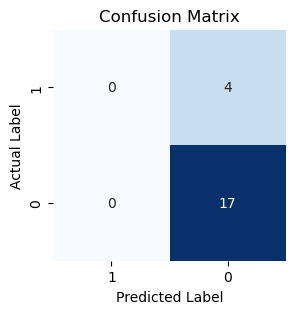

In [21]:
model_5_FLUOROURACIL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## CYCLOPHOSPHAMIDE

In [22]:
best_parameters = {'ldr': 0.3494330639019609,
 'batch_size': 64,
 'lr': 0.39030247926712036,
 'weight_decay': 0.06818718524649739,
 'momentum': 0.4377834367100149,
 'step_size': 39,
 'loops_train': 250,
 'hd': 2,
 'seed': 42}

In [23]:
model_CYCLOPHOSPHAMIDE = ModelTCGAClassifier('CYCLOPHOSPHAMIDE', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_CYCLOPHOSPHAMIDE.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.3494330639019609, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.3494330639019609, 'batch_size': 64, 'lr': 0.39030247926712036, 'weight_decay': 0.06818718524649739, 'momentum': 0.4377834367100149, 'step_size': 39, 'loops_train': 250, 'hd': 2, 'seed': 42}
-------CYCLOPHOSPHAMIDE-------
tcga train set size: 40
tcga validation set size: 10
pdx test set size: 0
tcga test set size: 19
Highest AUROC achieved during training: 0.8333333333333333
PDX test set not available
[0.99998105 0.99998138 0.99998152 0.99998176 0.9999

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,19,"{1: 17, 0: 2}",0.676471,0.953391


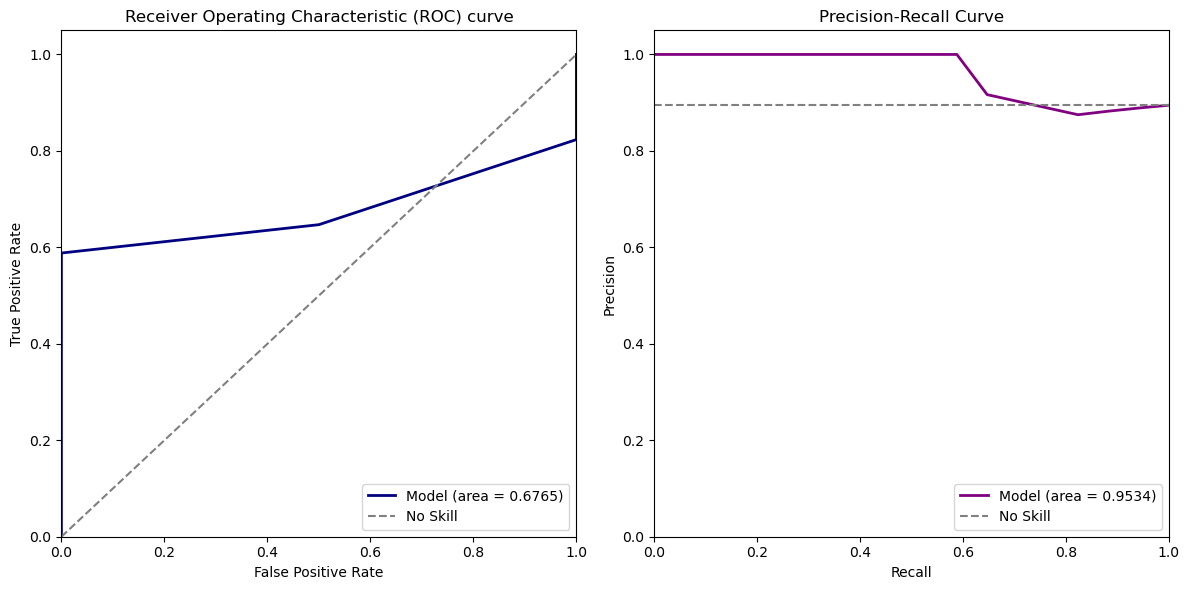

In [24]:
model_CYCLOPHOSPHAMIDE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [25]:
model_CYCLOPHOSPHAMIDE.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,50,"{1: 47, 0: 3}",0.308511,0.91969


Distribution of Predictions by Model
[0.99998105 0.99998152 0.99998176 0.99998194 0.99998212]
TP: 17, FP: 2, TN: 0, FN: 0


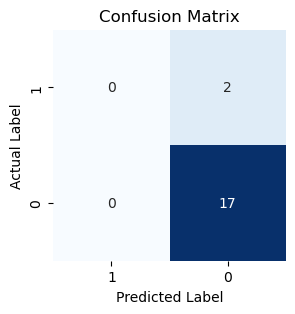

In [26]:
model_CYCLOPHOSPHAMIDE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## GEMCITABINE

In [27]:
best_parameters = {'ldr': 0.4356089534376223,
 'batch_size': 128,
 'lr': 0.44421218116536015,
 'weight_decay': 0.06485922964149642,
 'momentum': 0.28576264538484836,
 'step_size': 25,
 'loops_train': 250,
 'hd': 3,
 'seed': 42}

In [28]:
model_GEMCITABINE = ModelTCGAClassifier('GEMCITABINE', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_GEMCITABINE.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.4356089534376223, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.4356089534376223, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.4356089534376223, 'batch_size': 128, 'lr': 0.44421218116536015, 'weight_decay': 0.06485922964149642, 'momentum': 0.28576264538484836, 'step_size': 25, 'loops_train': 250, 'hd': 3, 'seed': 42}
-------GEMCITABINE-------
tcga tr

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,18,"{0: 9, 1: 9}",0.703704,0.721815


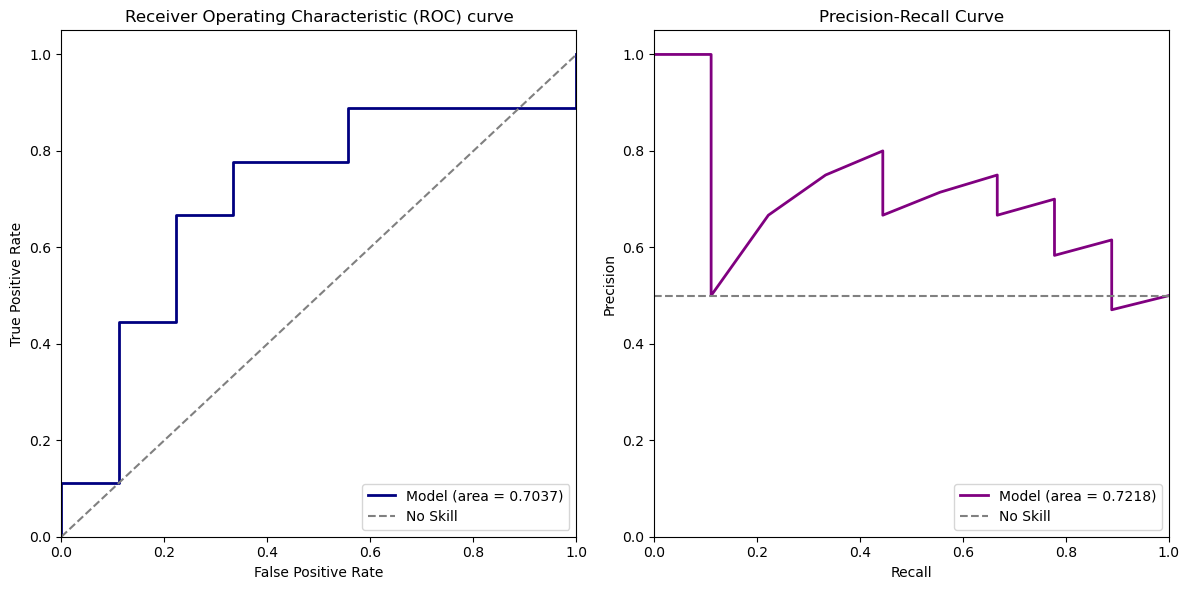

In [29]:
model_GEMCITABINE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [30]:
model_GEMCITABINE.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,44,"{1: 27, 0: 17}",0.736383,0.828052


Distribution of Predictions by Model
[0.66911215 0.66965334 0.6700002  0.6702071  0.67084324]
TP: 9, FP: 9, TN: 0, FN: 0


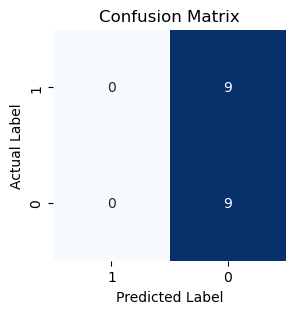

In [31]:
model_GEMCITABINE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)